## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.9ms	remaining: 58.8s
1:	learn: 0.9606716	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9390920	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9209237	total: 64.2ms	remaining: 16s
4:	learn: 0.9046978	total: 66.1ms	remaining: 13.1s
5:	learn: 0.8896854	total: 67.2ms	remaining: 11.1s
6:	learn: 0.8724151	total: 68ms	remaining: 9.65s
7:	learn: 0.8558633	total: 69ms	remaining: 8.56s
8:	learn: 0.8400199	total: 69.9ms	remaining: 7.7s
9:	learn: 0.8229065	total: 70.8ms	remaining: 7s
10:	learn: 0.8057776	total: 71.9ms	remaining: 6.46s
11:	learn: 0.7907426	total: 72.8ms	remaining: 5.99s
12:	learn: 0.7753485	total: 73.7ms	remaining: 5.6s
13:	learn: 0.7601130	total: 74.9ms	remaining: 5.27s
14:	learn: 0.7475256	total: 75.9ms	remaining: 4.98s
15:	learn: 0.7326054	total: 76.9ms	remaining: 4.73s
16:	learn: 0.7206853	total: 77.8ms	remaining: 4.5s
17:	learn: 0.7077303	total: 78.7ms	remaining: 4.29s
18:	learn: 0.6955287	total: 79.7ms	remaining: 4.11s
19:	

74:	learn: 0.3592857	total: 131ms	remaining: 1.61s
75:	learn: 0.3566659	total: 132ms	remaining: 1.6s
76:	learn: 0.3534377	total: 133ms	remaining: 1.59s
77:	learn: 0.3515212	total: 134ms	remaining: 1.59s
78:	learn: 0.3495794	total: 135ms	remaining: 1.57s
79:	learn: 0.3474536	total: 136ms	remaining: 1.56s
80:	learn: 0.3451276	total: 137ms	remaining: 1.55s
81:	learn: 0.3429903	total: 138ms	remaining: 1.54s
82:	learn: 0.3407333	total: 139ms	remaining: 1.53s
83:	learn: 0.3383421	total: 139ms	remaining: 1.52s
84:	learn: 0.3363138	total: 140ms	remaining: 1.51s
85:	learn: 0.3341552	total: 141ms	remaining: 1.5s
86:	learn: 0.3312622	total: 142ms	remaining: 1.49s
87:	learn: 0.3291335	total: 143ms	remaining: 1.48s
88:	learn: 0.3267592	total: 144ms	remaining: 1.47s
89:	learn: 0.3246472	total: 144ms	remaining: 1.46s
90:	learn: 0.3226321	total: 145ms	remaining: 1.45s
91:	learn: 0.3208859	total: 146ms	remaining: 1.44s
92:	learn: 0.3195327	total: 147ms	remaining: 1.43s
93:	learn: 0.3177265	total: 148ms

125:	learn: 0.2762040	total: 175ms	remaining: 1.22s
126:	learn: 0.2750143	total: 176ms	remaining: 1.21s
127:	learn: 0.2739443	total: 177ms	remaining: 1.21s
128:	learn: 0.2729034	total: 178ms	remaining: 1.2s
129:	learn: 0.2717962	total: 179ms	remaining: 1.2s
130:	learn: 0.2709413	total: 180ms	remaining: 1.19s
131:	learn: 0.2702408	total: 180ms	remaining: 1.19s
132:	learn: 0.2696005	total: 181ms	remaining: 1.18s
133:	learn: 0.2686078	total: 182ms	remaining: 1.18s
134:	learn: 0.2679522	total: 183ms	remaining: 1.17s
135:	learn: 0.2666442	total: 184ms	remaining: 1.17s
136:	learn: 0.2656536	total: 185ms	remaining: 1.16s
137:	learn: 0.2644756	total: 186ms	remaining: 1.16s
138:	learn: 0.2634933	total: 187ms	remaining: 1.16s
139:	learn: 0.2624546	total: 187ms	remaining: 1.15s
140:	learn: 0.2619103	total: 188ms	remaining: 1.15s
141:	learn: 0.2611219	total: 189ms	remaining: 1.14s
142:	learn: 0.2604558	total: 190ms	remaining: 1.14s
143:	learn: 0.2590422	total: 191ms	remaining: 1.14s
144:	learn: 0.

289:	learn: 0.1816580	total: 322ms	remaining: 788ms
290:	learn: 0.1812981	total: 323ms	remaining: 787ms
291:	learn: 0.1808362	total: 324ms	remaining: 785ms
292:	learn: 0.1802904	total: 325ms	remaining: 783ms
293:	learn: 0.1798726	total: 326ms	remaining: 782ms
294:	learn: 0.1794921	total: 327ms	remaining: 780ms
295:	learn: 0.1791051	total: 327ms	remaining: 779ms
296:	learn: 0.1788226	total: 328ms	remaining: 777ms
297:	learn: 0.1784691	total: 330ms	remaining: 778ms
298:	learn: 0.1781306	total: 331ms	remaining: 777ms
299:	learn: 0.1778034	total: 332ms	remaining: 775ms
300:	learn: 0.1773609	total: 333ms	remaining: 774ms
301:	learn: 0.1771097	total: 334ms	remaining: 773ms
302:	learn: 0.1766351	total: 335ms	remaining: 771ms
303:	learn: 0.1762749	total: 336ms	remaining: 770ms
304:	learn: 0.1758184	total: 337ms	remaining: 768ms
305:	learn: 0.1755761	total: 338ms	remaining: 766ms
306:	learn: 0.1752450	total: 339ms	remaining: 764ms
307:	learn: 0.1748989	total: 339ms	remaining: 763ms
308:	learn: 

338:	learn: 0.1648615	total: 366ms	remaining: 713ms
339:	learn: 0.1646361	total: 367ms	remaining: 712ms
340:	learn: 0.1643424	total: 368ms	remaining: 710ms
341:	learn: 0.1641025	total: 368ms	remaining: 709ms
342:	learn: 0.1637969	total: 369ms	remaining: 707ms
343:	learn: 0.1634989	total: 370ms	remaining: 705ms
344:	learn: 0.1631288	total: 371ms	remaining: 704ms
345:	learn: 0.1630031	total: 372ms	remaining: 703ms
346:	learn: 0.1625470	total: 373ms	remaining: 701ms
347:	learn: 0.1622545	total: 373ms	remaining: 700ms
348:	learn: 0.1619905	total: 374ms	remaining: 698ms
349:	learn: 0.1619095	total: 375ms	remaining: 697ms
350:	learn: 0.1616910	total: 376ms	remaining: 696ms
351:	learn: 0.1613933	total: 377ms	remaining: 694ms
352:	learn: 0.1611181	total: 378ms	remaining: 693ms
353:	learn: 0.1607851	total: 379ms	remaining: 691ms
354:	learn: 0.1604549	total: 380ms	remaining: 690ms
355:	learn: 0.1601748	total: 381ms	remaining: 689ms
356:	learn: 0.1600802	total: 382ms	remaining: 688ms
357:	learn: 

506:	learn: 0.1270468	total: 512ms	remaining: 498ms
507:	learn: 0.1268447	total: 513ms	remaining: 497ms
508:	learn: 0.1266565	total: 514ms	remaining: 496ms
509:	learn: 0.1265379	total: 515ms	remaining: 495ms
510:	learn: 0.1264936	total: 516ms	remaining: 493ms
511:	learn: 0.1263041	total: 516ms	remaining: 492ms
512:	learn: 0.1260636	total: 517ms	remaining: 491ms
513:	learn: 0.1257801	total: 518ms	remaining: 490ms
514:	learn: 0.1254765	total: 519ms	remaining: 489ms
515:	learn: 0.1254352	total: 522ms	remaining: 490ms
516:	learn: 0.1252340	total: 523ms	remaining: 488ms
517:	learn: 0.1252031	total: 524ms	remaining: 487ms
518:	learn: 0.1250256	total: 524ms	remaining: 486ms
519:	learn: 0.1247722	total: 525ms	remaining: 485ms
520:	learn: 0.1245918	total: 526ms	remaining: 484ms
521:	learn: 0.1243609	total: 527ms	remaining: 483ms
522:	learn: 0.1243283	total: 528ms	remaining: 481ms
523:	learn: 0.1241885	total: 529ms	remaining: 480ms
524:	learn: 0.1240465	total: 529ms	remaining: 479ms
525:	learn: 

554:	learn: 0.1189026	total: 556ms	remaining: 445ms
555:	learn: 0.1187021	total: 556ms	remaining: 444ms
556:	learn: 0.1185118	total: 557ms	remaining: 443ms
557:	learn: 0.1183468	total: 559ms	remaining: 443ms
558:	learn: 0.1181768	total: 560ms	remaining: 441ms
559:	learn: 0.1179853	total: 560ms	remaining: 440ms
560:	learn: 0.1177859	total: 561ms	remaining: 439ms
561:	learn: 0.1175936	total: 562ms	remaining: 438ms
562:	learn: 0.1174509	total: 563ms	remaining: 437ms
563:	learn: 0.1172948	total: 564ms	remaining: 436ms
564:	learn: 0.1171456	total: 564ms	remaining: 434ms
565:	learn: 0.1170940	total: 565ms	remaining: 433ms
566:	learn: 0.1169048	total: 566ms	remaining: 432ms
567:	learn: 0.1167425	total: 567ms	remaining: 431ms
568:	learn: 0.1166102	total: 568ms	remaining: 430ms
569:	learn: 0.1164306	total: 569ms	remaining: 429ms
570:	learn: 0.1162908	total: 570ms	remaining: 428ms
571:	learn: 0.1161027	total: 571ms	remaining: 427ms
572:	learn: 0.1159918	total: 572ms	remaining: 426ms
573:	learn: 

721:	learn: 0.0948780	total: 702ms	remaining: 270ms
722:	learn: 0.0947437	total: 703ms	remaining: 269ms
723:	learn: 0.0945983	total: 704ms	remaining: 268ms
724:	learn: 0.0944727	total: 705ms	remaining: 267ms
725:	learn: 0.0943233	total: 706ms	remaining: 266ms
726:	learn: 0.0941602	total: 707ms	remaining: 265ms
727:	learn: 0.0940411	total: 708ms	remaining: 264ms
728:	learn: 0.0939229	total: 709ms	remaining: 263ms
729:	learn: 0.0938195	total: 709ms	remaining: 262ms
730:	learn: 0.0936964	total: 710ms	remaining: 261ms
731:	learn: 0.0935119	total: 711ms	remaining: 260ms
732:	learn: 0.0934570	total: 712ms	remaining: 259ms
733:	learn: 0.0933055	total: 713ms	remaining: 258ms
734:	learn: 0.0932174	total: 714ms	remaining: 257ms
735:	learn: 0.0930800	total: 715ms	remaining: 256ms
736:	learn: 0.0929764	total: 715ms	remaining: 255ms
737:	learn: 0.0928240	total: 716ms	remaining: 254ms
738:	learn: 0.0927183	total: 717ms	remaining: 253ms
739:	learn: 0.0925957	total: 718ms	remaining: 252ms
740:	learn: 

771:	learn: 0.0888501	total: 745ms	remaining: 220ms
772:	learn: 0.0886622	total: 746ms	remaining: 219ms
773:	learn: 0.0885537	total: 747ms	remaining: 218ms
774:	learn: 0.0884440	total: 748ms	remaining: 217ms
775:	learn: 0.0883600	total: 749ms	remaining: 216ms
776:	learn: 0.0882487	total: 750ms	remaining: 215ms
777:	learn: 0.0881022	total: 751ms	remaining: 214ms
778:	learn: 0.0879793	total: 752ms	remaining: 213ms
779:	learn: 0.0879265	total: 752ms	remaining: 212ms
780:	learn: 0.0877857	total: 753ms	remaining: 211ms
781:	learn: 0.0877384	total: 754ms	remaining: 210ms
782:	learn: 0.0876342	total: 755ms	remaining: 209ms
783:	learn: 0.0874749	total: 756ms	remaining: 208ms
784:	learn: 0.0872790	total: 757ms	remaining: 207ms
785:	learn: 0.0871866	total: 759ms	remaining: 207ms
786:	learn: 0.0870605	total: 760ms	remaining: 206ms
787:	learn: 0.0869480	total: 761ms	remaining: 205ms
788:	learn: 0.0868796	total: 762ms	remaining: 204ms
789:	learn: 0.0867424	total: 763ms	remaining: 203ms
790:	learn: 

937:	learn: 0.0733790	total: 893ms	remaining: 59ms
938:	learn: 0.0733648	total: 894ms	remaining: 58.1ms
939:	learn: 0.0732843	total: 895ms	remaining: 57.1ms
940:	learn: 0.0732315	total: 896ms	remaining: 56.2ms
941:	learn: 0.0731403	total: 897ms	remaining: 55.2ms
942:	learn: 0.0730199	total: 898ms	remaining: 54.3ms
943:	learn: 0.0729180	total: 899ms	remaining: 53.3ms
944:	learn: 0.0728465	total: 900ms	remaining: 52.4ms
945:	learn: 0.0728162	total: 901ms	remaining: 51.4ms
946:	learn: 0.0726765	total: 902ms	remaining: 50.5ms
947:	learn: 0.0726307	total: 902ms	remaining: 49.5ms
948:	learn: 0.0725315	total: 903ms	remaining: 48.5ms
949:	learn: 0.0724728	total: 904ms	remaining: 47.6ms
950:	learn: 0.0723660	total: 905ms	remaining: 46.6ms
951:	learn: 0.0722875	total: 906ms	remaining: 45.7ms
952:	learn: 0.0721778	total: 907ms	remaining: 44.7ms
953:	learn: 0.0721051	total: 907ms	remaining: 43.8ms
954:	learn: 0.0719889	total: 908ms	remaining: 42.8ms
955:	learn: 0.0719137	total: 909ms	remaining: 41

986:	learn: 0.0695978	total: 937ms	remaining: 12.3ms
987:	learn: 0.0695103	total: 938ms	remaining: 11.4ms
988:	learn: 0.0694633	total: 939ms	remaining: 10.4ms
989:	learn: 0.0693641	total: 940ms	remaining: 9.49ms
990:	learn: 0.0693544	total: 941ms	remaining: 8.54ms
991:	learn: 0.0692877	total: 941ms	remaining: 7.59ms
992:	learn: 0.0691795	total: 942ms	remaining: 6.64ms
993:	learn: 0.0690561	total: 943ms	remaining: 5.69ms
994:	learn: 0.0689593	total: 944ms	remaining: 4.74ms
995:	learn: 0.0688740	total: 945ms	remaining: 3.79ms
996:	learn: 0.0688345	total: 946ms	remaining: 2.85ms
997:	learn: 0.0688269	total: 947ms	remaining: 1.9ms
998:	learn: 0.0687463	total: 947ms	remaining: 948us
999:	learn: 0.0687026	total: 948ms	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3882686029837218


#### Sanity Checks 

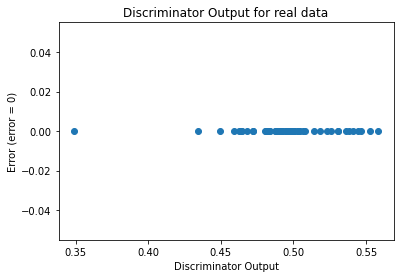

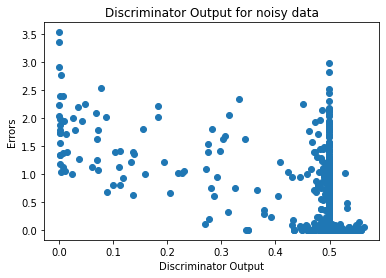

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 58


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.0850376921742967


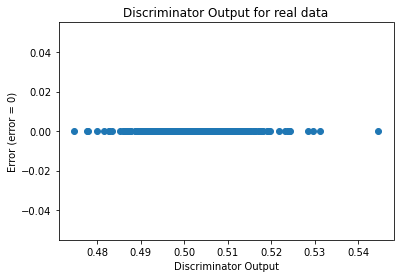

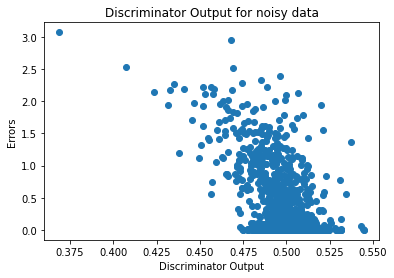

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.011524499291263885


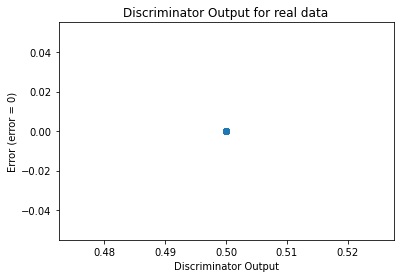

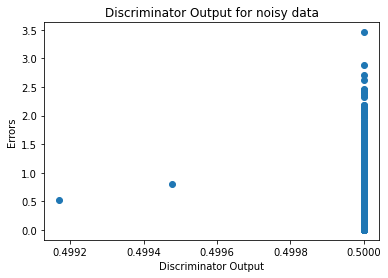

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0358]], requires_grad=True)
